In [ ]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.layers import Dropout
import tensorflow as tf
import pandas as pd
tf.config.run_functions_eagerly(True)
import pandas  as pd
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import skimage
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')
os.getcwd()

'C:\\Users\\91978\\Desktop\\mini_project\\self-built-masked-face-recognition-dataset\\self-built-masked-face-recognition-dataset'

In [ ]:
list_masked_names=[]
for x in os.listdir("AFDB_masked_face_dataset"):
  list_masked_names.append(x)

list_face_names=[]
for x in os.listdir("AFDB_face_dataset"):
  list_face_names.append(x)

In [ ]:
list_masked_names

['aidai',
 'anhu',
 'aoziyi',
 'axin',
 'baibaihe',
 'baijingting',
 'baike',
 'baobeier',
 'baojianfeng',
 'benxi',
 'caiguoqing',
 'caihancen',
 'caiyilin',
 'caizhuoyan',
 'caobingkun',
 'caoying',
 'caoyunjin',
 'cengyongti',
 'changshilei',
 'changyuan',
 'chenbailin',
 'chenderong',
 'chendouling',
 'chenfarong',
 'chenglong',
 'chenguanxi',
 'chenhaomin',
 'chenhe',
 'chenhuilin',
 'chenhuixian',
 'chenjiaqi',
 'chenkun',
 'chenlong',
 'chenqiaoen',
 'chenshu',
 'chenweiting',
 'chenxiang',
 'chenxinyu',
 'chenxuedong',
 'chenyanxi',
 'chenyao',
 'chenyi',
 'chenyixun',
 'chenyufan',
 'chenzhipeng',
 'cuishengxian',
 'cuixiuying',
 'cuiyuzhi',
 'daipeini',
 'dazhangwei',
 'dengchao',
 'denglun',
 'dengziqi',
 'dilireba',
 'dingding',
 'dingning',
 'ditianlin',
 'dongjie',
 'dongxuan',
 'dongyongpei',
 'duhaitao',
 'dujiang',
 'duwenze',
 'fanbingbing',
 'fanganna',
 'fangzuming',
 'fanshiqi',
 'fanwei',
 'fanyichen',
 'fengjianyu',
 'fuyuanhui',
 'ganwei',
 'gaoyixiang',
 'gaoyu

In [ ]:
face_images=[]
for folder_name in os.listdir("AFDB_face_dataset"):
  for filename in os.listdir("AFDB_face_dataset/"+folder_name):
    if filename.endswith("jpg"): 
      face_images.append(cv2.imread("AFDB_face_dataset/"+folder_name+"/"+filename))

In [ ]:
mask_images=[]
for folder_name in os.listdir("AFDB_masked_face_dataset"):
  for filename in os.listdir("AFDB_masked_face_dataset/"+folder_name):
    if filename.endswith("jpg"): 
      mask_images.append(cv2.imread("AFDB_masked_face_dataset/"+folder_name+"/"+filename))

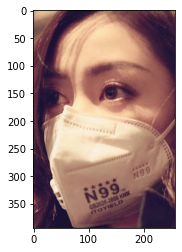

In [ ]:
plt.imshow(cv2.cvtColor(mask_images[0], cv2.COLOR_BGR2RGB))

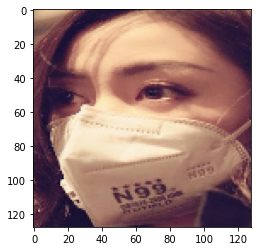

In [ ]:
resized_image = cv2.resize(mask_images[0], (128,128), 
                           interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

In [ ]:
mask_images_final=[]
for i in range (0,len(mask_images)):
 mask_images_final.append( cv2.resize(mask_images[i], (128,128), 
                           interpolation=cv2.INTER_NEAREST))
    

In [ ]:
 mask_images[90]

array([[[123, 135, 147],
        [167, 179, 191],
        [214, 226, 238],
        ...,
        [200, 210, 220],
        [200, 209, 219],
        [204, 210, 221]],

       [[142, 154, 166],
        [181, 193, 205],
        [218, 230, 240],
        ...,
        [202, 212, 222],
        [203, 212, 222],
        [208, 214, 225]],

       [[159, 171, 181],
        [198, 210, 220],
        [223, 233, 243],
        ...,
        [200, 210, 220],
        [206, 215, 225],
        [208, 217, 227]],

       ...,

       [[229, 226, 228],
        [220, 215, 217],
        [217, 209, 210],
        ...,
        [ 72,  35,  43],
        [ 68,  34,  41],
        [ 66,  31,  41]],

       [[228, 223, 225],
        [229, 223, 224],
        [181, 170, 172],
        ...,
        [ 69,  35,  42],
        [ 67,  32,  42],
        [ 66,  31,  41]],

       [[228, 223, 224],
        [220, 214, 215],
        [184, 173, 175],
        ...,
        [ 68,  33,  43],
        [ 67,  31,  43],
        [ 67,  31,  43]]

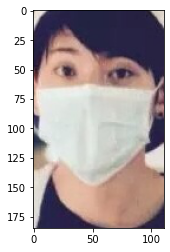

In [ ]:
plt.imshow(cv2.cvtColor(mask_images[90], cv2.COLOR_BGR2RGB))

In [ ]:
face_images_final=[]
for i in range (0,len(face_images)):
 face_images_final.append(cv2.resize(face_images[i], (128,128), 
                           interpolation=cv2.INTER_NEAREST)
                         )

In [ ]:
y_face = [ 0 for i in range(len(face_images_final))]
y_mask = [ 1 for i in range(len(mask_images_final))]



In [ ]:
X = face_images_final[:20000]+mask_images_final
y =  y_face[:20000]+y_mask

In [ ]:
X=np.array(X)
X.shape

(22118, 128, 128, 3)

In [ ]:
y=np.array(y)
y.shape

(22118,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5)

In [ ]:
X_train.shape

(11059, 128, 128, 3)

In [ ]:
y_train.shape

(11059,)

In [ ]:
y_test.shape

(11059,)

In [ ]:
X_test.shape

(11059, 128, 128, 3)

In [ ]:
import skimage

from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(12,12),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])

In [ ]:
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_test_hog  = np.array([hog(img,pixels_per_cell=(12,12),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_test_hog.shape

(11059, 1620)

In [ ]:
X_test_hog.shape

(11059, 1620)

In [ ]:
X_train1=X_train.reshape(11059,49152)
X_test1=X_test.reshape(11059,49152)

In [ ]:
X_train_hog.shape

(11059, 1620)

In [ ]:
y_train.shape

(11059,)

In [ ]:



#MLP & KNN





In [ ]:
from sklearn.neighbors import KNeighborsClassifier

im1=KNeighborsClassifier(algorithm= 'auto', leaf_size= 30, n_neighbors= 1)
m1=im1.fit(X_train_hog,y_train)
m1.score(X_test_hog,y_test)


0.8305452572565332

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp=MLPClassifier()

In [ ]:
m3=mlp.fit(X_train_hog,y_train)
m3.score(X_test_hog,y_test)


0.8305452572565332

In [ ]:



#RandomForestClassifier





In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(criterion='entropy')

In [ ]:
m4=rfc.fit(X_train_hog,y_train)
rfc.score(X_test_hog,y_test)


0.8305452572565332

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=49152))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train1,y_train, epochs=5, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/5
277/277 - 244s - loss: 2.7212 - accuracy: 0.9038 - val_loss: 2.7280 - val_accuracy: 0.9033
Epoch 2/5
277/277 - 240s - loss: 2.7212 - accuracy: 0.9038 - val_loss: 2.7280 - val_accuracy: 0.9033
Epoch 3/5
277/277 - 231s - loss: 2.7212 - accuracy: 0.9038 - val_loss: 2.7280 - val_accuracy: 0.9033
Epoch 4/5
277/277 - 240s - loss: 2.7212 - accuracy: 0.9038 - val_loss: 2.7280 - val_accuracy: 0.9033
Epoch 5/5
277/277 - 240s - loss: 2.7212 - accuracy: 0.9038 - val_loss: 2.7280 - val_accuracy: 0.9033


In [1]:
#all values for every epoch isn't supposed to be same hence the kernel seems to be misbehaving but no restarting or changing produced any effect so we let them as it is

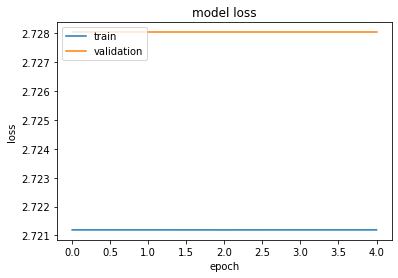

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
score = model.evaluate(X_test1, y_test, batch_size=128, verbose=0)
score

[2.709165334701538, 0.9047834277153015]

In [ ]:




#SVM






In [ ]:
mask_final=[]
for i in range(len(mask_images)):
  mask_final.append(cv2.resize(mask_images[i], (32,32), interpolation=cv2.INTER_NEAREST))

face_final=[]
for i in range(len(face_images)):
  face_final.append(cv2.resize(face_images[i], (32,32), interpolation=cv2.INTER_NEAREST))

In [ ]:
X = face_final[0:20000]+mask_final
y =  y_face[0:20000]+y_mask

In [ ]:
len(X)

22118

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

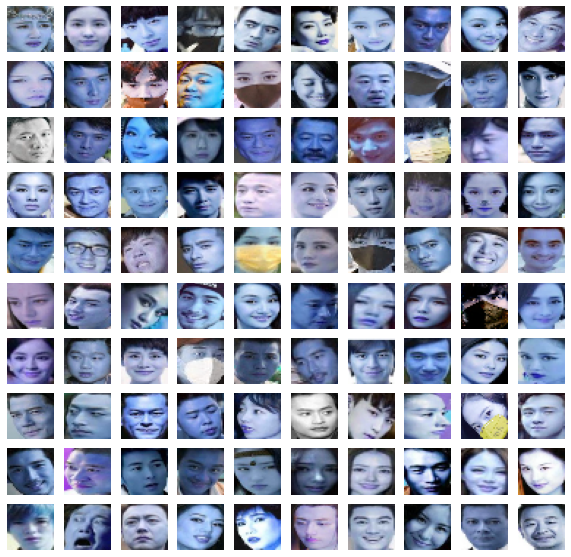

In [ ]:
fig = plt.figure(figsize=(10, 10))
for i in range(500,600):
  fig.add_subplot(10,10, i+1-500)
  plt.imshow(X_train[i])
  plt.axis('off')

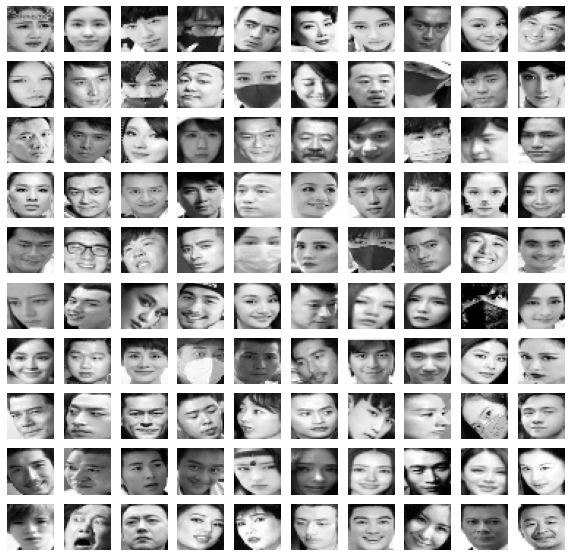

In [ ]:
import cv2
X_train_grey=[]
for i in range(len(X_train)):
  X_train_grey.append(cv2.cvtColor(X_train[i], cv2.COLOR_BGR2GRAY))

fig = plt.figure(figsize=(10, 10))
for i in range(500,600):
  fig.add_subplot(10,10, i+1-500)
  plt.imshow(X_train_grey[i],cmap='gray')
  plt.axis('off')

In [ ]:
import skimage
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale

In [ ]:
X_train_grey = np.array([skimage.color.rgb2gray(img) for img in X_train])
X_train_hog  = np.array([hog(img,pixels_per_cell=(12,12),cells_per_block=(2, 2),orientations=5) for img in X_train_grey])
X_test_grey = np.array([skimage.color.rgb2gray(img) for img in X_test])
X_test_hog  = np.array([hog(img,pixels_per_cell=(12,12),cells_per_block=(2, 2),orientations=5) for img in X_test_grey])

In [ ]:
X_train_hog[0].shape

(20,)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(gamma="auto",decision_function_shape="ovo",C=1)
svm.fit(X_train_hog,y_train)
y_pred = svm.predict(X_test_hog)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9077674292431503

In [ ]:
#gridsearchcv
from sklearn.model_selection import GridSearchCV
svm_1={'kernel':['linear', 'rbf', 'sigmoid'],'decision_function_shape':['ovo', 'ovr'],'C':[0.1,1,10]}

In [ ]:
gs_svm_1=GridSearchCV(SVC(),svm_1,scoring='accuracy')

In [ ]:
gs_svm_1.fit(X_train_hog,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
gs_svm_1.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}

In [ ]:
gs = pd.DataFrame(gs_svm_1.cv_results_)
gs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_decision_function_shape,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.758296,0.129025,0.058260,0.001547,0.1,ovo,linear,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.900995,0.900542,0.900542,0.900542,0.900950,0.900714,0.000211,11
1,2.029530,0.249920,0.125811,0.017075,0.1,ovo,rbf,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.910488,0.908228,0.911392,0.912297,0.909091,0.910299,0.001481,7
2,1.979586,0.179314,0.164007,0.009597,0.1,ovo,sigmoid,"{'C': 0.1, 'decision_function_shape': 'ovo', '...",0.900995,0.900542,0.900542,0.900542,0.900950,0.900714,0.000211,11
3,1.697242,0.156558,0.058804,0.002639,0.1,ovr,linear,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.900995,0.900542,0.900542,0.900542,0.900950,0.900714,0.000211,11
4,1.896073,0.124483,0.119807,0.012914,0.1,ovr,rbf,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.910488,0.908228,0.911392,0.912297,0.909091,0.910299,0.001481,7
5,1.967138,0.157260,0.167246,0.010125,0.1,ovr,sigmoid,"{'C': 0.1, 'decision_function_shape': 'ovr', '...",0.900995,0.900542,0.900542,0.900542,0.900950,0.900714,0.000211,11
6,1.863974,0.391434,0.058106,0.003170,1,ovo,linear,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.900995,0.900542,0.900542,0.901447,0.900950,0.900895,0.000336,9
7,1.935365,0.068017,0.107205,0.002713,1,ovo,rbf,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.924955,0.923599,0.930380,0.924051,0.924469,0.925490,0.002486,3
8,2.026496,0.524699,0.150859,0.001722,1,ovo,sigmoid,"{'C': 1, 'decision_function_shape': 'ovo', 'ke...",0.900995,0.900542,0.900542,0.900542,0.900950,0.900714,0.000211,11
9,1.503758,0.100481,0.054206,0.002213,1,ovr,linear,"{'C': 1, 'decision_function_shape': 'ovr', 'ke...",0.900995,0.900542,0.900542,0.901447,0.900950,0.900895,0.000336,9


In [ ]:
y_pred = gs_svm_1.predict(X_test_hog)

In [ ]:
accuracy_score(y_pred,y_test)

0.9367031377158875